In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Warning ! This script works with the default table values!

In [2]:
# Generate the lookup tables (it will take a few minutes)
os.system("./table_generator --table_type breit_wheeler --precision single --name bw_s")
os.system("./table_generator --table_type breit_wheeler --precision double --name bw_d")
os.system("./table_generator --table_type quantum_synchrotron --precision single --name qs_s")
os.system("./table_generator --table_type quantum_synchrotron --precision double --name qs_d")

0

### Breit-Wheeler T function

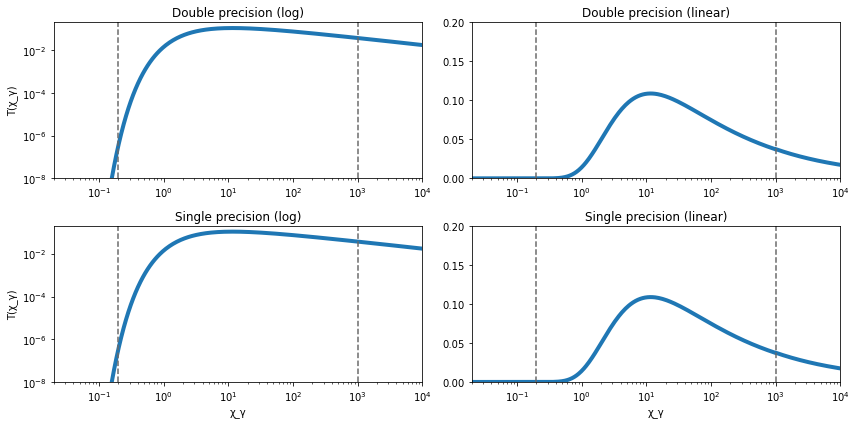

In [3]:
def do_BW_T_plot():
    T_d = np.genfromtxt("bw_d_dndt.csv", delimiter=',')
    T_s = np.genfromtxt("bw_s_dndt.csv", delimiter=',')

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    axs[1][0].set_xlabel("χ_γ")
    axs[1][1].set_xlabel("χ_γ")
    axs[0][0].set_ylabel("T(χ_γ)")
    axs[1][0].set_ylabel("T(χ_γ)")

    axs[0][0].loglog(T_d[:,0], T_d[:,1], linewidth=4)
    axs[0][0].set_ylim(1e-8,2e-1)
    axs[0][0].set_xlim(2e-2,1e4)
    axs[0][0].set_title("Double precision (log)")
    axs[0][0].axvline(x=2e-1,linestyle='dashed',color="dimgray")
    axs[0][0].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[0][1].semilogx(T_d[:,0], T_d[:,1], linewidth=4)
    axs[0][1].set_ylim(0,2e-1)
    axs[0][1].set_xlim(2e-2,1e4)
    axs[0][1].set_title("Double precision (linear)")
    axs[0][1].axvline(x=2e-1,linestyle='dashed',color="dimgray")
    axs[0][1].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[1][0].loglog(T_s[:,0], T_s[:,1], linewidth=4)
    axs[1][0].set_ylim(1e-8,2e-1)
    axs[1][0].set_xlim(2e-2,1e4)
    axs[1][0].set_title("Single precision (log)")
    axs[1][0].axvline(x=2e-1,linestyle='dashed',color="dimgray")
    axs[1][0].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[1][1].semilogx(T_s[:,0], T_s[:,1], linewidth=4)
    axs[1][1].set_ylim(0,2e-1)
    axs[1][1].set_xlim(2e-2,1e4)
    axs[1][1].set_title("Single precision (linear)")
    axs[1][1].axvline(x=2e-1,linestyle='dashed',color="dimgray")
    axs[1][1].axvline(x=1e3,linestyle='dashed',color="dimgray")

    plt.tight_layout()
    
do_BW_T_plot()

### Breit-Wheeler cumulative probability

<ipython-input-4-948e01bb6ae4>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = axs[0].pcolormesh(np.log10(chi_phot_d),prob_d, frac_d, vmin=0, vmax=1)
<ipython-input-4-948e01bb6ae4>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = axs[1].pcolormesh(np.log10(chi_phot_s),prob_s, frac_s, vmin=0, vmax=1)


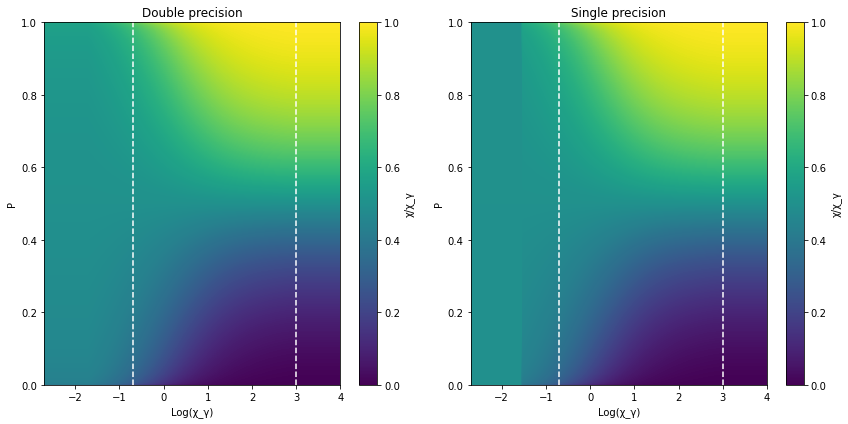

In [4]:
def do_BW_P_plot():
    BW_P_d = np.genfromtxt("bw_d_pairprod.csv", delimiter=',')
    BW_P_s = np.genfromtxt("bw_s_pairprod.csv", delimiter=',')

    chi_phot_d = np.unique(BW_P_d[:,0])
    prob_d = np.unique(BW_P_d[:,1])
    frac_d = np.transpose(np.reshape(BW_P_d[:,2], (np.size(chi_phot_d), np.size(prob_d))))

    chi_phot_s = np.unique(BW_P_s[:,0])
    prob_s = np.unique(BW_P_s[:,1])
    frac_s = np.transpose(np.reshape(BW_P_s[:,2], (np.size(chi_phot_s), np.size(prob_s))))

    fig, axs = plt.subplots(1, 2, figsize=(12,6))

    axs[0].set_xlabel("Log(χ_γ)")
    axs[1].set_xlabel("Log(χ_γ)")
    axs[0].set_ylabel("P")
    axs[1].set_ylabel("P")

    im0 = axs[0].pcolormesh(np.log10(chi_phot_d),prob_d, frac_d, vmin=0, vmax=1)
    plt.colorbar(im0, ax=axs[0], label="χ/χ_γ")
    axs[0].set_title("Double precision")
    axs[0].axvline(x=np.log10(2e-1),linestyle='dashed',color="white")
    axs[0].axvline(x=np.log10(1e3),linestyle='dashed',color="white")


    im1 = axs[1].pcolormesh(np.log10(chi_phot_s),prob_s, frac_s, vmin=0, vmax=1)
    plt.colorbar(im1, ax=axs[1], label="χ/χ_γ")
    axs[1].set_title("Single precision")
    axs[1].axvline(x=np.log10(2e-1),linestyle='dashed',color="white")
    axs[1].axvline(x=np.log10(1e3),linestyle='dashed',color="white")
    
    plt.tight_layout()
    
do_BW_P_plot()

### Quantum Synchrotron G function

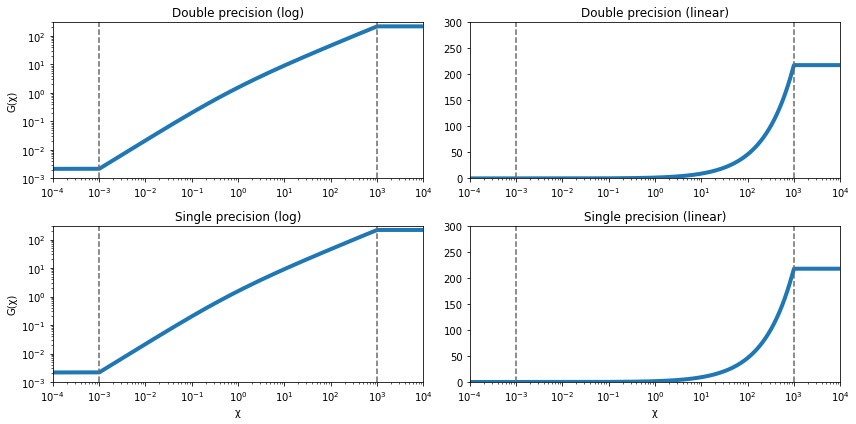

In [5]:
def do_QS_G_plot():
    G_d = np.genfromtxt("qs_d_dndt.csv", delimiter=',')
    G_s = np.genfromtxt("qs_s_dndt.csv", delimiter=',')

    fig, axs = plt.subplots(2, 2, figsize=(12,6))

    axs[1][0].set_xlabel("χ")
    axs[1][1].set_xlabel("χ")
    axs[0][0].set_ylabel("G(χ)")
    axs[1][0].set_ylabel("G(χ)")

    axs[0][0].loglog(G_d[:,0], G_d[:,1], linewidth=4)
    axs[0][0].set_ylim(1e-3,3e2)
    axs[0][0].set_xlim(1e-4,1e4)
    axs[0][0].set_title("Double precision (log)")
    axs[0][0].axvline(x=1e-3,linestyle='dashed',color="dimgray")
    axs[0][0].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[0][1].semilogx(G_d[:,0], G_d[:,1], linewidth=4)
    axs[0][1].set_ylim(0,3e2)
    axs[0][1].set_xlim(1e-4,1e4)
    axs[0][1].set_title("Double precision (linear)")
    axs[0][1].axvline(x=1e-3,linestyle='dashed',color="dimgray")
    axs[0][1].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[1][0].loglog(G_s[:,0], G_s[:,1], linewidth=4)
    axs[1][0].set_ylim(1e-3,3e2)
    axs[1][0].set_xlim(1e-4,1e4)
    axs[1][0].set_title("Single precision (log)")
    axs[1][0].axvline(x=1e-3,linestyle='dashed',color="dimgray")
    axs[1][0].axvline(x=1e3,linestyle='dashed',color="dimgray")

    axs[1][1].semilogx(G_s[:,0], G_s[:,1], linewidth=4)
    axs[1][1].set_ylim(0,3e2)
    axs[1][1].set_xlim(1e-4,1e4)
    axs[1][1].set_title("Single precision (linear)")
    axs[1][1].axvline(x=1e-3,linestyle='dashed',color="dimgray")
    axs[1][1].axvline(x=1e3,linestyle='dashed',color="dimgray")
    
    plt.tight_layout()
    
do_QS_G_plot()

### Quantum Synchrotron cumulative probability

<ipython-input-6-c044924d34c8>:21: RuntimeWarning: divide by zero encountered in log10
  logprob_d = np.log10(prob_d)
<ipython-input-6-c044924d34c8>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0 = axs[0].pcolormesh(np.log10(chi_part_d),logprob_d, frac_d, norm=LogNorm(vmin=1e-8, vmax=1))
<ipython-input-6-c044924d34c8>:30: RuntimeWarning: divide by zero encountered in log10
  logprob_s = np.log10(prob_s)
<ipython-input-6-c044924d34c8>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an e

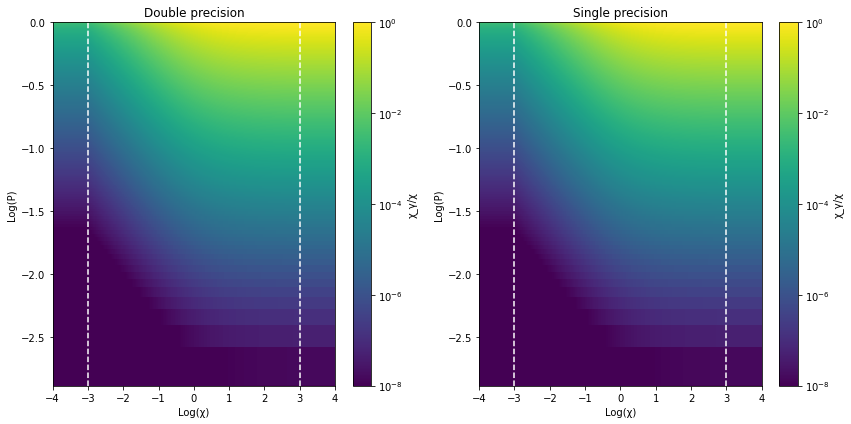

In [6]:
def do_QS_P_plot():

    QS_P_d = np.genfromtxt("qs_d_photem.csv", delimiter=',')
    QS_P_s = np.genfromtxt("qs_s_photem.csv", delimiter=',')

    chi_part_d = np.unique(QS_P_d[:,0])
    prob_d = 1-np.unique(QS_P_d[:,1])
    frac_d = np.transpose(np.reshape(QS_P_d[:,2], (np.size(chi_part_d), np.size(prob_d))))

    chi_part_s = np.unique(QS_P_s[:,0])
    prob_s = 1-np.unique(QS_P_s[:,1])
    frac_s = np.transpose(np.reshape(QS_P_s[:,2], (np.size(chi_part_s), np.size(prob_s))))

    fig, axs = plt.subplots(1, 2, figsize=(12,6))

    axs[0].set_xlabel("Log(χ)")
    axs[1].set_xlabel("Log(χ)")
    axs[0].set_ylabel("Log(P)")
    axs[1].set_ylabel("Log(P)")
    
    logprob_d = np.log10(prob_d)
    logprob_d[np.isneginf(logprob_d)] = -10
    im0 = axs[0].pcolormesh(np.log10(chi_part_d),logprob_d, frac_d, norm=LogNorm(vmin=1e-8, vmax=1))
    plt.colorbar(im0, ax=axs[0], label="χ_γ/χ")
    axs[0].set_title("Double precision")
    axs[0].set_ylim(logprob_d[-2],0)
    axs[0].axvline(x=np.log10(1e-3),linestyle='dashed',color="white")
    axs[0].axvline(x=np.log10(1e3),linestyle='dashed',color="white")

    logprob_s = np.log10(prob_s)
    logprob_s[np.isneginf(logprob_s)] = -10
    im1 = axs[1].pcolormesh(np.log10(chi_part_s),logprob_s, frac_s, norm=LogNorm(vmin=1e-8, vmax=1))
    plt.colorbar(im1, ax=axs[1], label="χ_γ/χ")
    axs[1].set_title("Single precision")
    axs[1].set_ylim(logprob_s[-2],0)
    axs[1].axvline(x=np.log10(1e-3),linestyle='dashed',color="white")
    axs[1].axvline(x=np.log10(1e3),linestyle='dashed',color="white")
    
    plt.tight_layout()
    
do_QS_P_plot()